<a href="https://colab.research.google.com/github/rathour08/ANN-Group_Activity/blob/main/co2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing data visualization and manipulation libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importing machine learning libraries

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset

df = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [4]:
df.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)

In [5]:
df2 = df.copy()

In [6]:
df2.drop('Fuel Consumption Comb (mpg)', axis = 1, inplace = True)

In [7]:
df2.rename(columns={'Fuel Consumption Comb (L/100 km)' : 'Fuel_Cons_comb_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Cons_hwy_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption City (L/100 km)' : 'Fuel_Cons_city_(l/100km)'}, inplace=True)

In [8]:
df2.rename(columns={'Fuel Type' : 'Fuel_type'}, inplace=True)

In [9]:
#updated dataset

df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [10]:
#getting to know the dataset a little more in the next few steps

df['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

In [11]:
df['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [12]:
#discovering correlation

df.corr()['CO2_emission'].sort_values()

Fuel Consumption Comb (mpg)        -0.907426
Cylinders                           0.832644
Engine Size(L)                      0.851145
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2_emission                        1.000000
Name: CO2_emission, dtype: float64

<ipython-input-13-ff6a278af0c9>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'Blues', square = True)


<AxesSubplot:>

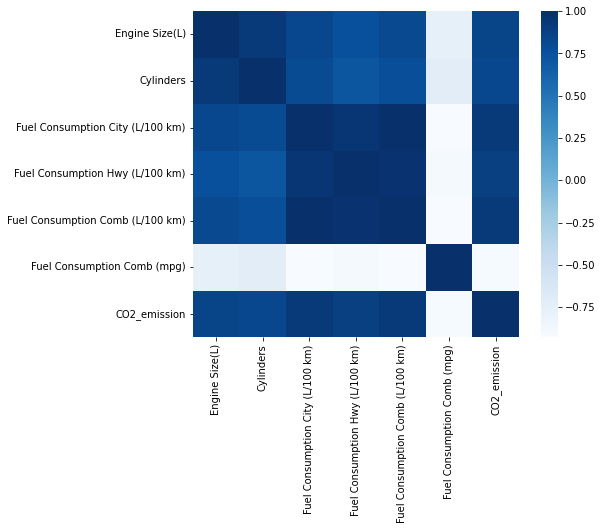

In [13]:
#heatmap for a better understanding of correlated values

plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'Blues', square = True)

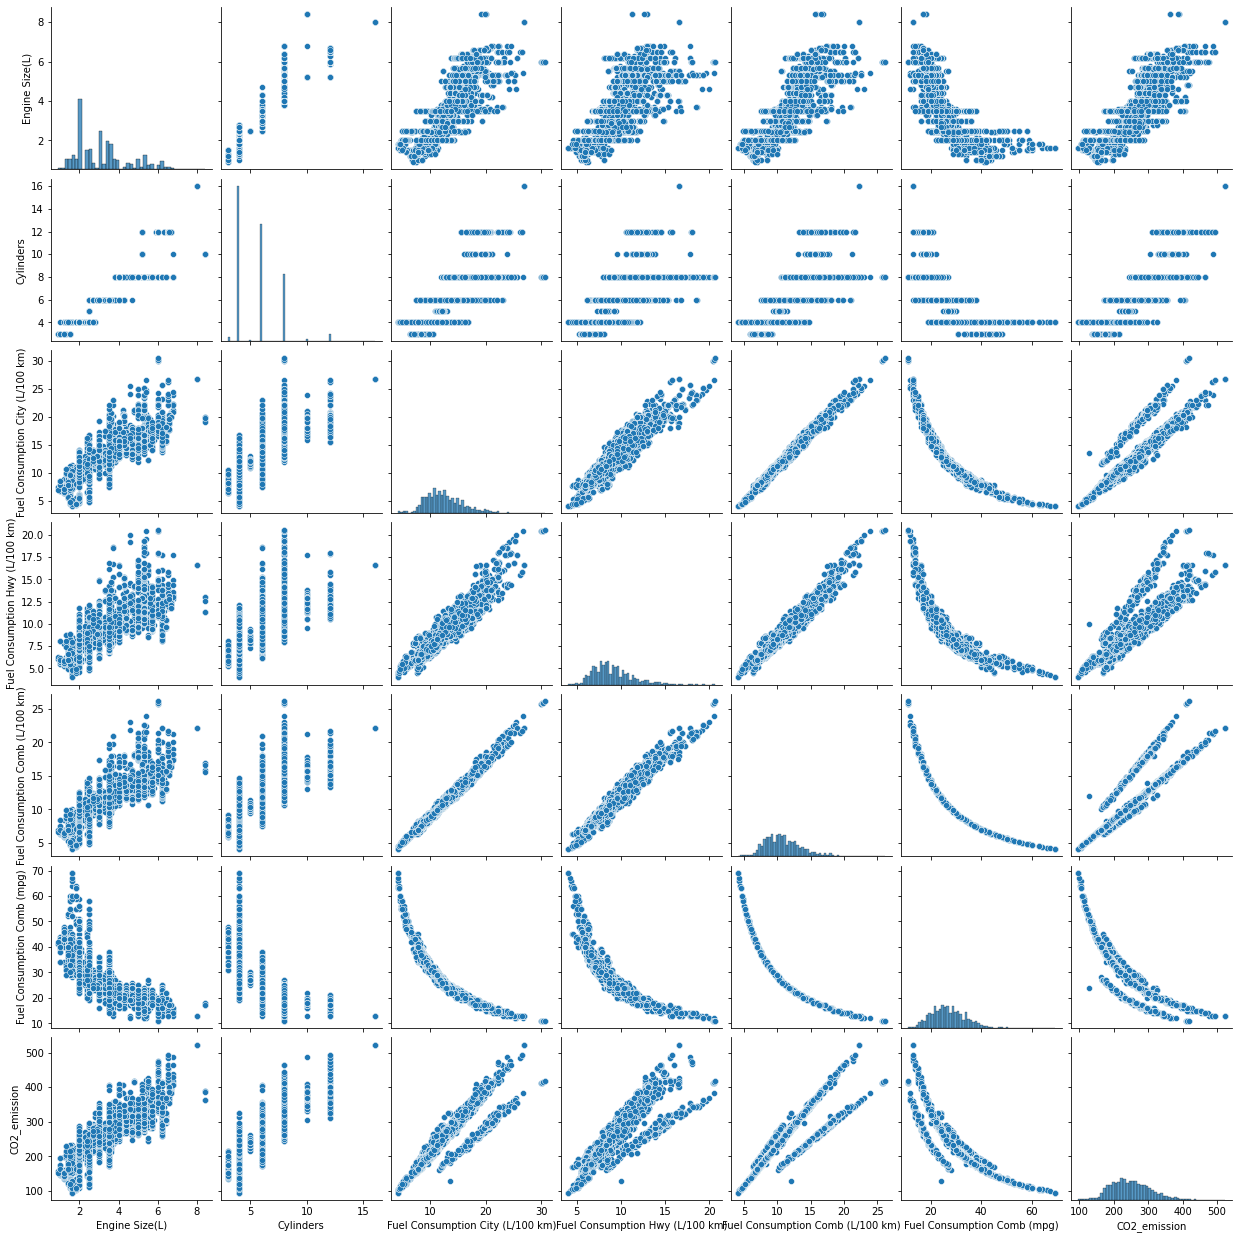

In [14]:
#I have a habit of using pairplot function of seaborn to see how each individual graph looks like

sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'FORD'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'MERCEDES-BENZ'),
  Text(4, 0, 'PORSCHE'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'AUDI'),
  Text(8, 0, 'NISSAN'),
  Text(9, 0, 'JEEP'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'HONDA'),
  Text(13, 0, 'HYUNDAI'),
  Text(14, 0, 'MINI'),
  Text(15, 0, 'VOLKSWAGEN'),
  Text(16, 0, 'MAZDA'),
  Text(17, 0, 'LEXUS'),
  Text(18, 0, 'JAGUAR'),
  Text(19, 0, 'CADILLAC'),
  Text(20, 0, 'SUBARU'),
  Text(21, 0, 'VOLVO'),
  Text(22, 0, 'INFINITI'),
  Text(23, 0, 'BUICK'),
  Text(24, 0, 'RAM'),
  Text(25, 0, 'LINCOLN'),
  Text(26, 0, 'MITSUBISHI'),
  Text(27, 0, 'CHRYSLER'),
  Text(28, 0, 'LAND ROVER'),
  Text(29, 0, 'FIAT'),
  Text(30, 0, 'ACURA'),
  Text(31, 0, 'MASERATI'),
  Text(32, 0

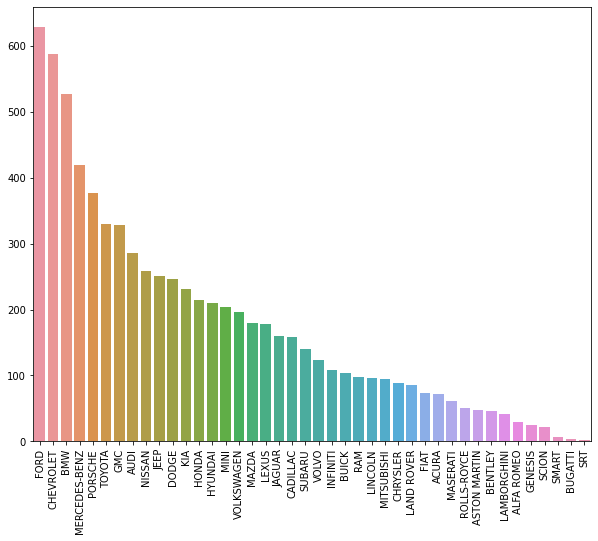

In [15]:
#Some visualizations to show our understanding of the dataset

mkI = df['Make'].value_counts().index
mkV = df['Make'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkI,mkV)
plt.xticks(rotation='vertical')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

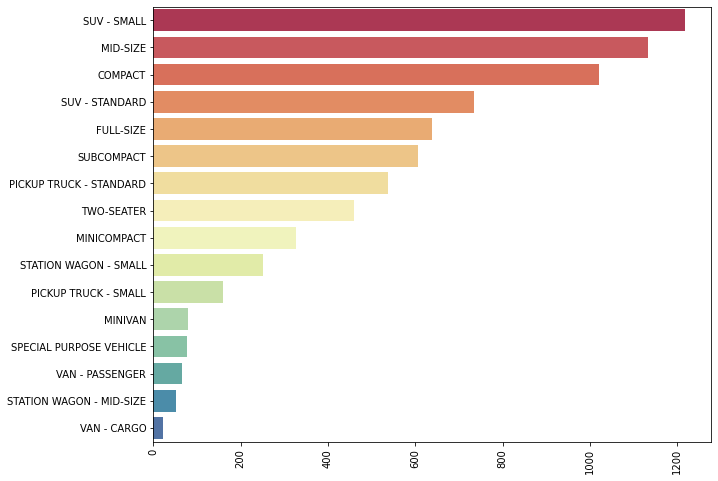

In [16]:
mkI = df['Vehicle Class'].value_counts().index
mkV = df['Vehicle Class'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkV,mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'COMPACT'),
  Text(1, 0, 'SUV - SMALL'),
  Text(2, 0, 'MID-SIZE'),
  Text(3, 0, 'TWO-SEATER'),
  Text(4, 0, 'MINICOMPACT'),
  Text(5, 0, 'SUBCOMPACT'),
  Text(6, 0, 'FULL-SIZE'),
  Text(7, 0, 'STATION WAGON - SMALL'),
  Text(8, 0, 'SUV - STANDARD'),
  Text(9, 0, 'VAN - CARGO'),
  Text(10, 0, 'VAN - PASSENGER'),
  Text(11, 0, 'PICKUP TRUCK - STANDARD'),
  Text(12, 0, 'MINIVAN'),
  Text(13, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(14, 0, 'STATION WAGON - MID-SIZE'),
  Text(15, 0, 'PICKUP TRUCK - SMALL')])

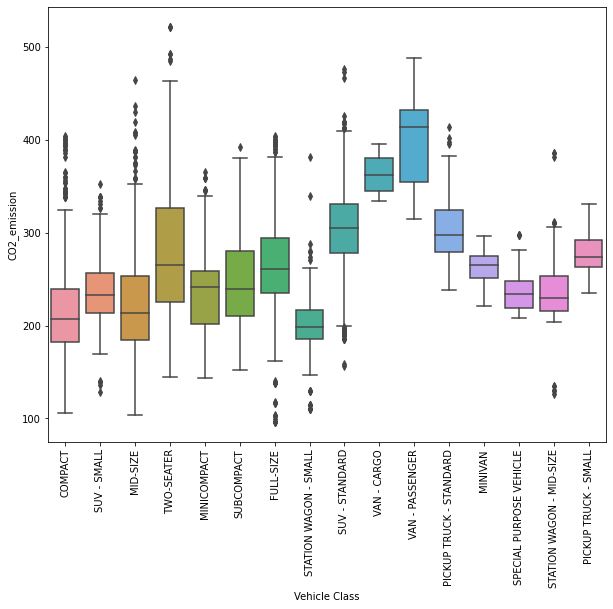

In [17]:
#this boxplot shows us that Vans typically emit more CO2 when compared to other vehicle classes

plt.figure(figsize = (10,8))
sns.boxplot(x="Vehicle Class", y="CO2_emission", data=df)
plt.xticks(rotation = 'vertical')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


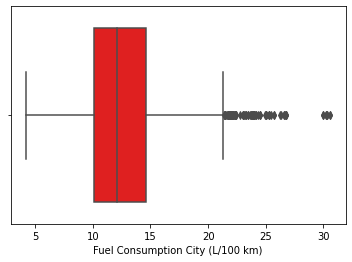

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


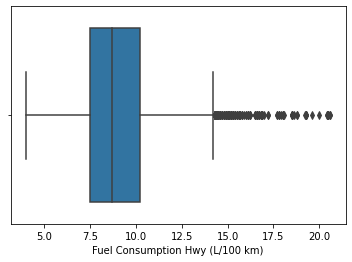

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


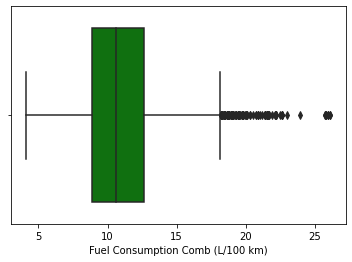

In [18]:
sns.boxplot(df['Fuel Consumption City (L/100 km)'], color = "red")
plt.show()
sns.boxplot(df['Fuel Consumption Hwy (L/100 km)'])
plt.show()
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'], color = 'green')
plt.show()

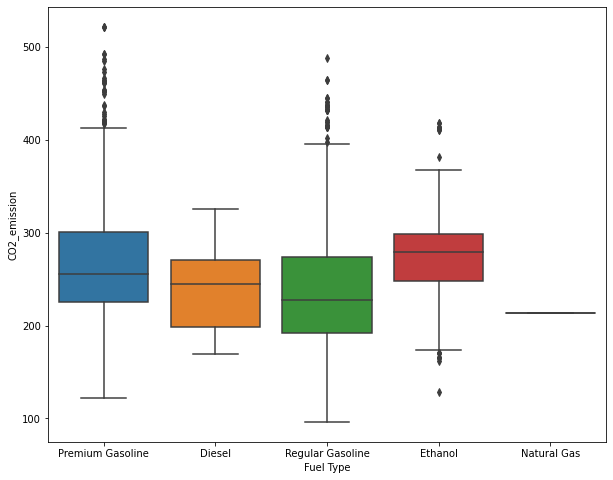

In [19]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Fuel Type' , y = 'CO2_emission', data = df)
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])
plt.show()

<Figure size 720x576 with 0 Axes>

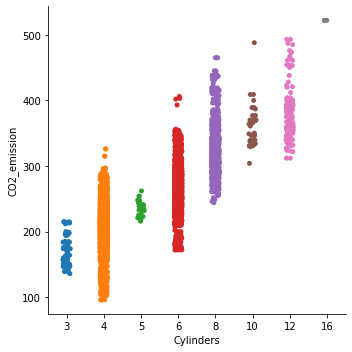

In [20]:
plt.figure(figsize = (10,8))
sns.catplot(x = 'Cylinders' , y = 'CO2_emission', data = df)
plt.show()

([<matplotlib.axis.XTick at 0x7fa965dc6a30>,
 [Text(0, 0, 'Premium Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Regular Gasoline'),
  Text(3, 0, 'Ethanol'),
  Text(4, 0, 'Natural Gas')])

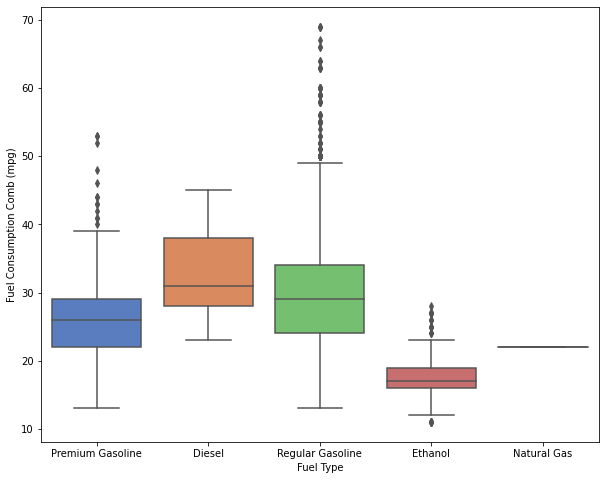

In [21]:
#Ethanol typically is the most efficient fuel type 

plt.figure(figsize = (10,8))
sns.boxplot(y = 'Fuel Consumption Comb (mpg)', x = 'Fuel Type', data = df, palette = 'muted')
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

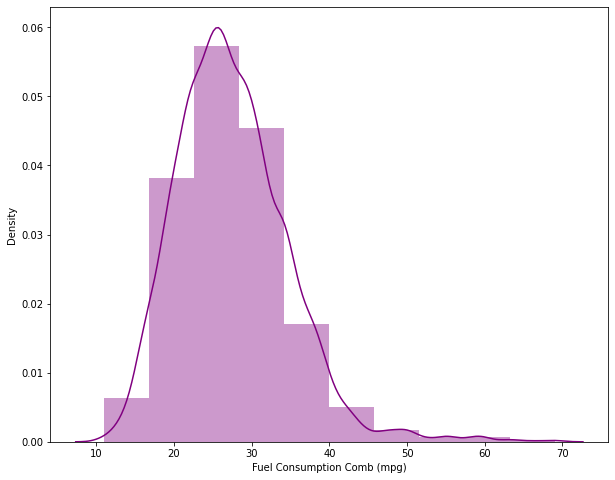

In [22]:
plt.figure(figsize = (10,8))
sns.distplot(df['Fuel Consumption Comb (mpg)'], bins = 10, color = 'purple')

In [23]:
df2.drop('Make', axis = 1, inplace = True)
df2.drop('Model', axis = 1, inplace = True)
df2.drop('Vehicle Class', axis = 1, inplace = True)

In [24]:
df2

,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel_Cons_city_(l/100km),Fuel_Cons_hwy_(l/100km),Fuel_Cons_comb_(l/100km),CO2_emission
0,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2.4,4,M6,Z,11.2,7.7,9.6,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,AS8,Z,10.7,7.7,9.4,219
7381,2.0,4,AS8,Z,11.2,8.3,9.9,232
7382,2.0,4,AS8,Z,11.7,8.6,10.3,240
7383,2.0,4,AS8,Z,11.2,8.3,9.9,232


In [25]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

encode.fit(df2.Fuel_type.drop_duplicates()) 
df2.Fuel_type = encode.transform(df2.Fuel_type)

encode.fit(df2.Transmission.drop_duplicates())
df2.Transmission = encode.transform(df2.Transmission)

In [26]:
#assigning dependent and independent variables
#can be used with any column across the dataset provided hyperparameters are adjusted accordingly

x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [27]:
#splitting and reshaping data into testing and training sets

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)

# xTrain= xTrain.reshape(-1, 1)
# yTrain= yTrain.reshape(-1, 1)
# xTest = xTest.reshape(-1, 1)
# yTest = yTest.reshape(-1, 1)

In [28]:
#linear regression model achieving 85% accuracy

reg = LinearRegression()
reg.fit(xTrain, yTrain)
regYpred = reg.predict(xTest)
print(reg.score(xTest,yTest))

0.895557281109858


In [29]:
#I printed the coefficient and the intercept here to compare my model built from scratch against the imported scikit learn model

print('regression coefficient', reg.coef_, 'intercept', reg.intercept_)

regression coefficient [ 5.9291501   3.98805418 -0.14442068 10.06480752 -0.24773334  0.85868361
 14.09180563] intercept 19.229294116258245


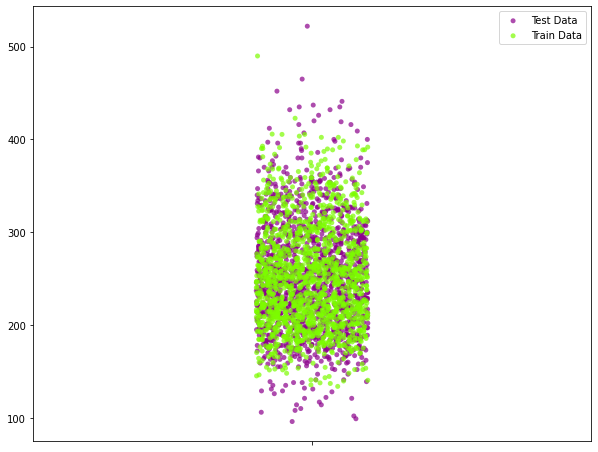

In [30]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = regYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


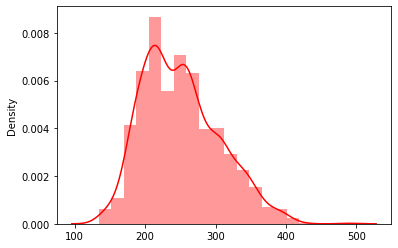

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


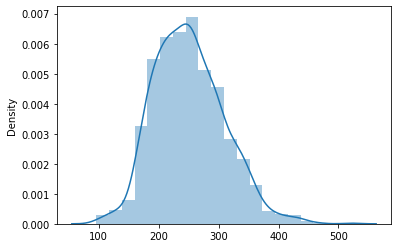

In [31]:
#I used these histograms to show Predicted values vs. Actual values in all three models

sns.distplot(regYpred, bins = 20, color = 'red')
plt.title = 'Predicted values'
plt.show()
sns.distplot(yTest, bins = 20)
plt.title = 'Actual values'
plt.show()

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2_emission'>

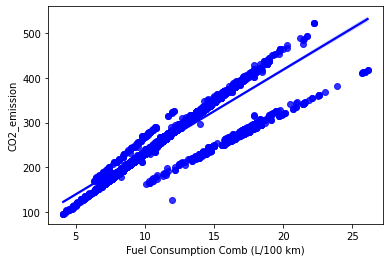

In [32]:
#Regression line showing best fit

sns.regplot(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2_emission', data  = df, color = 'blue')

In [33]:
#Decision Tree model got us a higher accuracy at 88%

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(xTrain, yTrain)
dtrYpred = dtr.predict(xTest)
dtrScore = r2_score(yTest,dtrYpred)
print('Score: %.3f' % dtrScore)

Score: 0.996


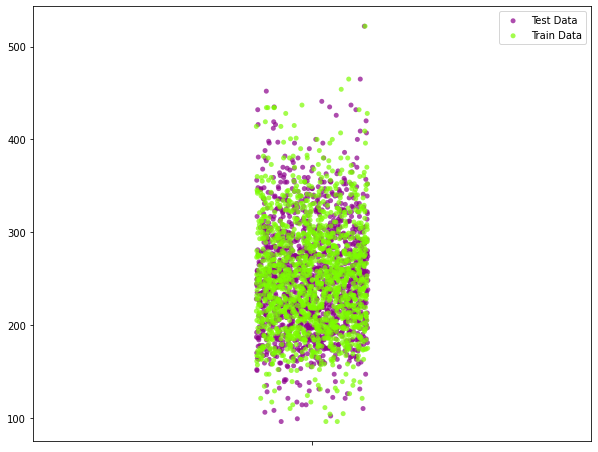

In [34]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = dtrYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


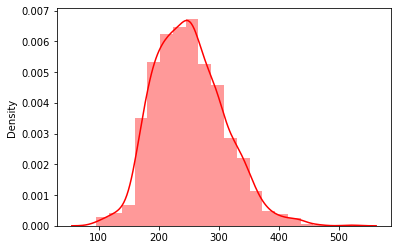

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


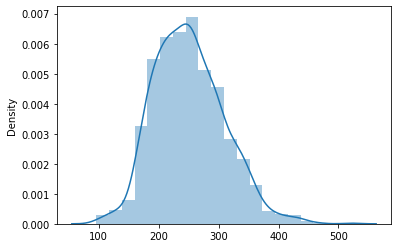

In [35]:
sns.distplot(dtrYpred, bins = 20, color = 'red')
plt.show()
sns.distplot(yTest, bins = 20)
plt.show()

In [36]:
#Random Forest Regressor had the highest accuracy standing at 89%
#I used a for loop for the n estimators to see which yielded the highest accuracy, it landed at 20

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, random_state = 0)
rfr.fit(xTrain, yTrain)
rfrYpred = rfr.predict(xTest)
rfrScore = r2_score(yTest,rfrYpred)
print('Score: %.3f' % rfrScore)

Score: 0.996


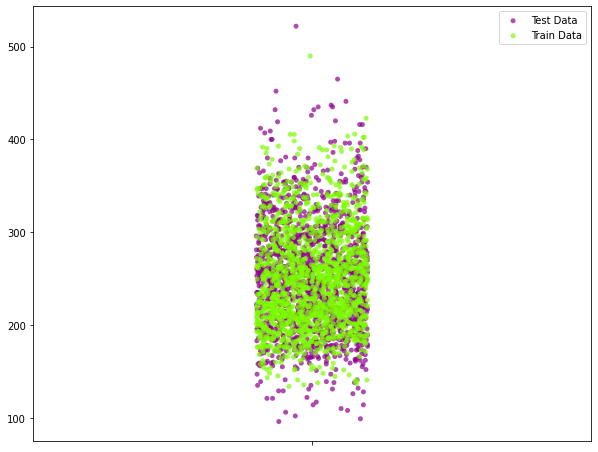

In [37]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = regYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


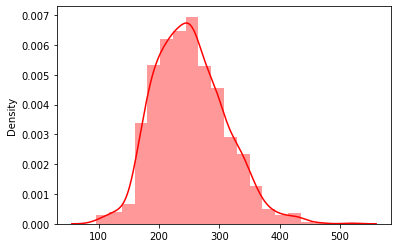

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


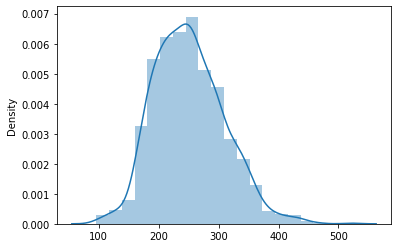

In [38]:
sns.distplot(rfrYpred, bins = 20, color = 'red')
plt.show()
sns.distplot(yTest, bins = 20)
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])

In [40]:
from sklearn.svm import SVR
X = df.drop('CO2_emission', axis=1)
y = df['CO2_emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Fit an SVR model to the training data
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 1085.5179206855182


In [42]:
from sklearn.metrics import r2_score

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.6750014994391913
